In [1]:
import numpy as np
import torch

## 선형 회귀(Linear Regression)

- 데이터에 대한 이해(Data Definition)
> 학습할 데이터에 대한 이해
- 가설(Hypothesis) 수립
> 가설을 수립하는 방법 이해
- 손실 계산하기(Compute loss)
> 학습 데이터를 이용해서 연속적으로 모델을 개선시키는 데 손실 이용
- 경사 하강법(Gradient Descent)
> 학습을 위한 핵심 알고리즘인 경사 하강법에 대한 이해

### 데이터에 대한 이해

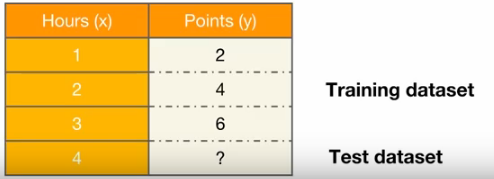

- 어떤 학생이 1시간 공부를 했더니 2점, 다른 학생이 2시간 공부를 했더니 4점, 또 다른 학생이 3시간을 공부했더니 6점을 맞았습니다. 그렇다면, 내가 4시간을 공부한다면 몇 점을 맞을 수 있을까요?

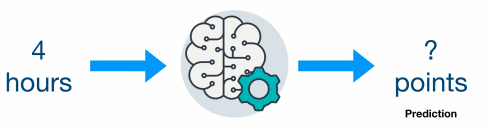

- 이 질문에 대답하기 위해서 1시간, 2시간, 3시간을 공부했을 때 각각 2점, 4점, 6점이 나왔다는 앞서 나온 정보를 이용해야 합니다. 이때 예측을 위해 사용하는 데이터를 훈련 데이터셋(training dataset)이라고 합니다. 학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 테스트 데이터셋(test dataset)이라고 합니다.

### 훈련 데이터셋의 구성

- 모델을 학습시키기 위한 데이터는 파이토치의 텐서의 형태(Torch.tensor)를 가지고 있어야 합니다. 그리고 입력과 출력을 각기 다른 텐서에 저장할 필요가 있습니다. 이때 보편적으로 입력은 x, 출력은 y를 사용하여 표기합니다.

In [2]:
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

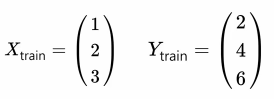

### 가설 수립

- 선형 회귀의 가설은 아래와 같은 형식을 가집니다.
y = Wx + b

- 가설의 H를 따서 y대신 다음과 같이 식을 표현하기도 합니다.
H(x) = Wx + b

- 이때 x와 곱해지는 W를 가중치(Weight)라고 하며, b를 편향(bias)라고 합니다.

### 비용 함수(Cost function)에 대한 이해

- 비용 함수(Cost function) = 손실 함수(Loss function) = 오차 함수(Error function) = 목적 함수(Objective function)

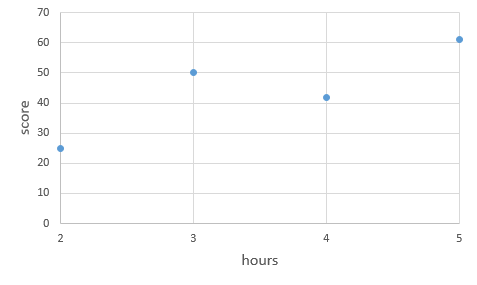

- 4개의 점을 가장 잘 표현하는 직선을 그리는 일입니다. 임의로 3개의 직선을 그려보겠습니다.

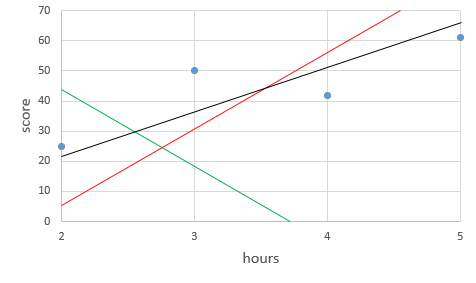

- 위의 그림은 서로 다른 W와 b의 값에 따라서 천차만별로 그려진 3개의 직선의 모습을 보여줍니다. 이 3개의 직선 중에서 4개의 점을 가장 잘 반영한 직선은 어떤 직선인가요? 검은색 직선이라고 말하는 사람도 있을 것이고, 잘 모르겠다고 말하는 사람도 있을 것입니다. 검은색 직선이라고 말하는 사람은 검은색 직선이 가장 4개의 점에 가깝게 지나가는 느낌을 받고 있기 때문입니다. 하지만 수학에서 느낌이라는 표현을 사용하는 것은 아무런 의미도 없습니다. 어떤 직선이 가장 적절한 직선인지를 수학적인 근거를 대서 표현할 수 있어야 합니다. 그래서 오차(Error)라는 개념을 도입하겠습니다.

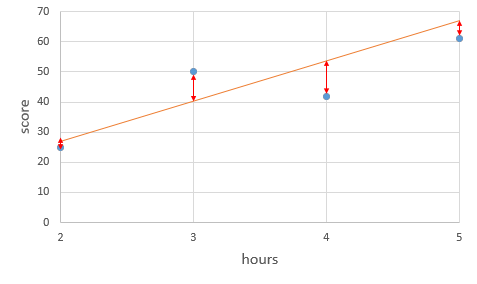

- 위 그림은 임의로 그려진 주황색 선에 대해서 각 실제값과 직선의 예측값에 대한 값의 차이를 빨간색 화살표로 표현한 것입니다. 각 실제값과 각 예측값과의 차이고, 이를 각 실제값에서의 오차라고 말할 수 있습니다. 이 직선의 예측값들과 실제값들과의 총 오차는 모든 오차를 다 더하면 될 것 같습니다.